<a href="https://colab.research.google.com/github/igsgo/NASA-Bearing-Predictive-Maintenance/blob/main/Projeto_desgaste_rolamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vinayak123tyagi/bearing-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.56G/1.56G [00:54<00:00, 30.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vinayak123tyagi/bearing-dataset/versions/1


**Importando as bibliotecas**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

**Vamos usar os dados do 2nd test**

In [ ]:
search_path = os.path.join(path, '**','2nd_test')
folders_found = glob.glob(search_path, recursive = True)
print(f"Pasta localizada: {folders_found[0]}")

Pasta localizada: /root/.cache/kagglehub/datasets/vinayak123tyagi/bearing-dataset/versions/1/2nd_test


**Listando os arquivos de dados**

In [ ]:
conteudo_bruto = os.listdir(folders_found[0])
print(f"\nQuantidade total de itens na pasta: {len(conteudo_bruto)}")

print(conteudo_bruto[:5])


Quantidade total de itens na pasta: 1
['2nd_test']


**Tem uma pasta dentro da outra, vamos entrar na subpasta '2nd_test'**

In [ ]:
final_data_dir = os.path.join(folders_found[0],'2nd_test')
print({final_data_dir})

{'/root/.cache/kagglehub/datasets/vinayak123tyagi/bearing-dataset/versions/1/2nd_test/2nd_test'}


**Listando os arquivos**

In [ ]:
files = sorted(os.listdir(final_data_dir))
print(f"\nTotal de arquivos encontrados: {len(files)}")
print(f"\nPrimeiro arquivo: {files[0]}")
print(f"\nÚltimo arquivo: {files[-1]}")


Total de arquivos encontrados: 984

Primeiro arquivo: 2004.02.12.10.32.39

Último arquivo: 2004.02.19.06.22.39


**Vamos ver se tem dados nulos**


*   Chamei as colunas de B1, B2, B3 e B4 para facilitar (cada coluna é um rolamento)



In [ ]:
path_arquivo_teste = os.path.join(final_data_dir, files[0])
df_healthy = pd.read_csv(path_arquivo_teste, sep = '\t', header = None)
df_healthy.columns = ['B1','B2','B3','B4']
df_healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20480 entries, 0 to 20479
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B1      20480 non-null  float64
 1   B2      20480 non-null  float64
 2   B3      20480 non-null  float64
 3   B4      20480 non-null  float64
dtypes: float64(4)
memory usage: 640.1 KB


**Agora, vamos calcular o RMS e a Curtose para cada um dos 4 rolamentos e guardar em uma tabela nova**


*   ***RMS:*** Nos ajudará a identificar um problema existente, uma vez que quando o rolamennto está danificado, ele treme muito, assim o RMS sobe.

*   ***Curtose:*** Nos ajudará a prever um problema ainda não existente, uma vez que quando há um pico súbito na vibração o RMS não sobe muito, enquanto a Curtose sobe bastante.



In [ ]:
import numpy as np
from scipy.stats import kurtosis

dados_processados = []
for i, filename in enumerate(files):
  caminho = os.path.join(final_data_dir, filename)
  df = pd.read_csv(caminho, sep='\t', header=None)

  metricas = {'Data': filename}
  for col in df.columns:
    nome_rolamento = f"B{col+1}"
    dados_vibracao = df[col]

    rms = np.sqrt(np.mean(dados_vibracao**2))
    curtose = kurtosis(dados_vibracao)
    metricas[f'{nome_rolamento}_RMS'] = rms
    metricas[f'{nome_rolamento}_Kurtosis'] = curtose

  dados_processados.append(metricas)

df_final = pd.DataFrame(dados_processados)

**Convertendo os dados de texto para tempo**

In [ ]:
df_final ['Data']=pd.to_datetime(df_final['Data'],format = '%Y.%m.%d.%H.%M.%S')
df_final = df_final.set_index('Data')

df_final.head()

,B1_RMS,B1_Kurtosis,B2_RMS,B2_Kurtosis,B3_RMS,B3_Kurtosis,B4_RMS,B4_Kurtosis
Data,,,,,,,,
2004-02-12 10:32:39,0.074179,0.628763,0.090944,0.506801,0.109404,3.213075,0.054103,0.065959
2004-02-12 10:42:39,0.075382,0.648291,0.093419,0.253014,0.109817,1.395250,0.056101,0.107539
2004-02-12 10:52:39,0.076230,0.513475,0.093718,0.310789,0.109861,2.639948,0.056145,0.257236
2004-02-12 11:02:39,0.078724,1.157953,0.092947,0.235341,0.110667,2.682779,0.056807,0.806190
2004-02-12 11:12:39,0.078474,0.603177,0.095348,0.226309,0.107506,1.578395,0.056841,0.138954


**Avaliando o comportamento do RMS e da Curtose para os 4 rolamentos**

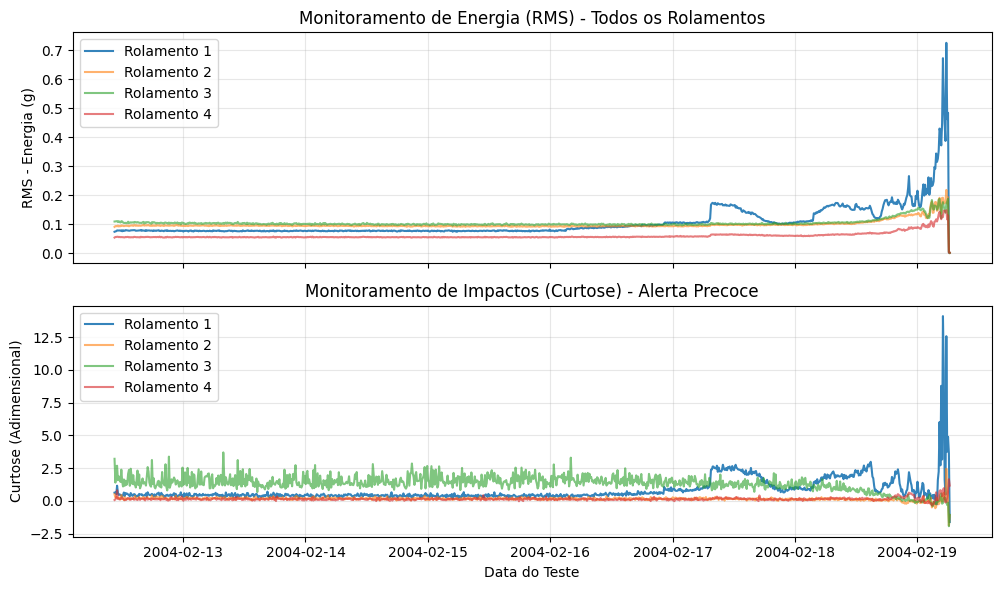

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax1.plot(df_final.index, df_final['B1_RMS'], label='Rolamento 1', alpha=0.9)
ax1.plot(df_final.index, df_final['B2_RMS'], label='Rolamento 2', alpha=0.6)
ax1.plot(df_final.index, df_final['B3_RMS'], label='Rolamento 3', alpha=0.6)
ax1.plot(df_final.index, df_final['B4_RMS'], label='Rolamento 4', alpha=0.6)

ax1.set_ylabel('RMS - Energia (g)')
ax1.set_title('Monitoramento de Energia (RMS) - Todos os Rolamentos')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

ax2.plot(df_final.index, df_final['B1_Kurtosis'], label='Rolamento 1', alpha=0.9)
ax2.plot(df_final.index, df_final['B2_Kurtosis'], label='Rolamento 2', alpha=0.6)
ax2.plot(df_final.index, df_final['B3_Kurtosis'], label='Rolamento 3', alpha=0.6)
ax2.plot(df_final.index, df_final['B4_Kurtosis'], label='Rolamento 4', alpha=0.6)

ax2.set_ylabel('Curtose (Adimensional)')
ax2.set_xlabel('Data do Teste')
ax2.set_title('Monitoramento de Impactos (Curtose) - Alerta Precoce')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Vimos o gráfico, e dá para ver que o rolamento 1 (azul) foi destruído. Mas, a gente não pode ficar vendo gráfico de rolamento toda hora, vamos fazer uma análise preditiva para ensinar à máquina como é o comportamento de um rolamento saudável e o de um prestes a falhar**

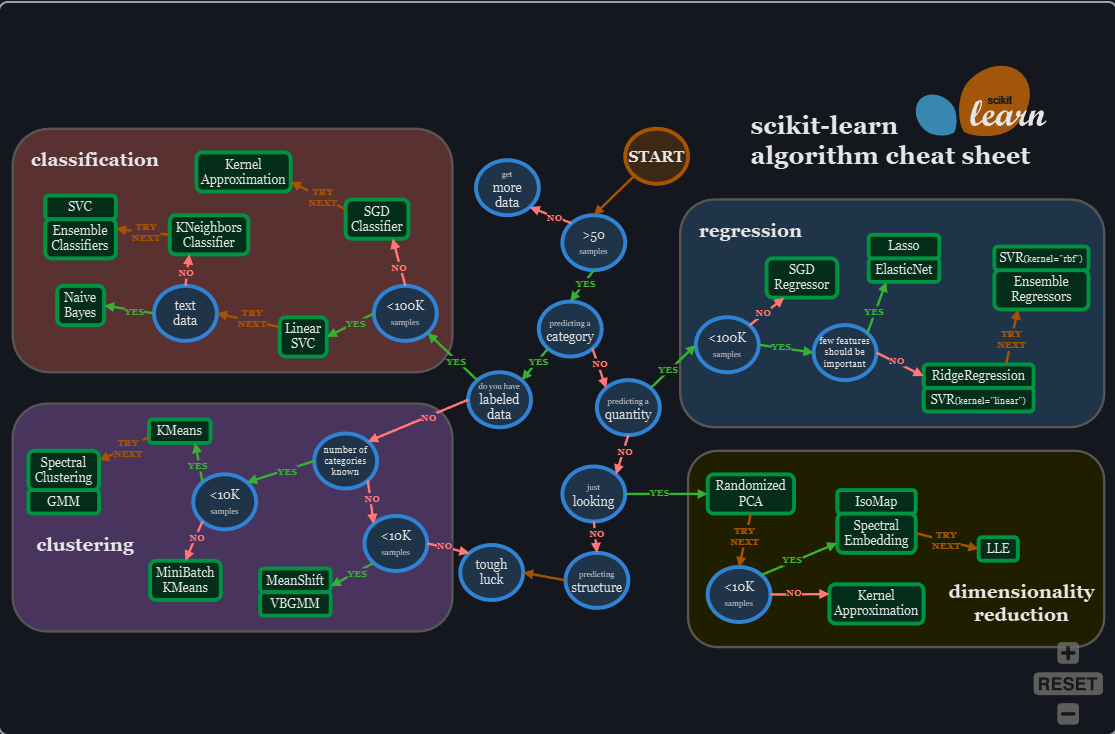

**De acordo com o mapa, podemos utilizar K-Means ou GMM, logo, iremos comparar a acurácia dos dois modelos para decidir o mais adequado para essa situação**

**Para garantir o gabarito, iremos falar que a falha aconteceu a partir do dia 17 no rolamento 1**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df_final['Gabarito']=0
df_final.loc['2004-02-17':,'Gabarito']=1

features = ['B1_RMS','B1_Kurtosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final[features])

X_train_clean = X_scaled[df_final.index <= '2004-02-15']

kmeans = KMeans(n_clusters=1, random_state=42, n_init = 10)
kmeans.fit(X_train_clean)
distancias = kmeans.transform(X_scaled)
limiar_km = np.percentile(kmeans.transform(X_train_clean),99)
pred_kmeans = [1 if d > limiar_km else 0 for d in distancias]

gmm = GaussianMixture(n_components = 1, random_state = 42)
gmm.fit(X_train_clean)
log_probs = gmm.score_samples(X_scaled)
limiar_gmm = np.percentile(gmm.score_samples(X_train_clean), 1)
pred_gmm = [1 if p < limiar_gmm else 0 for p in log_probs]

print("\n=== PLACAR FINAL ===")
acc_km = accuracy_score(df_final['Gabarito'], pred_kmeans)
f1_km = f1_score(df_final['Gabarito'], pred_kmeans)
print(f"K-Means -> Acurácia: {acc_km*100:.1f}% | F1-Score: {f1_km:.2f}")

acc_gmm = accuracy_score(df_final['Gabarito'], pred_gmm)
f1_gmm = f1_score(df_final['Gabarito'], pred_gmm)
print(f"GMM     -> Acurácia: {acc_gmm*100:.1f}% | F1-Score: {f1_gmm:.2f}")

vencedor = pred_gmm if f1_gmm > f1_km else pred_kmeans
nome_vencedor = "GMM" if f1_gmm > f1_km else "K-Means"

print(f"\nO Vencedor foi: {nome_vencedor}!")


=== PLACAR FINAL ===
K-Means -> Acurácia: 91.5% | F1-Score: 0.89
GMM     -> Acurácia: 86.6% | F1-Score: 0.83

O Vencedor foi: K-Means!


**O K-Means teve tanto uma acurácia quanto um F1-Score melhor, logo é o modelo mais adequado para essa situação**

**Agora, vamos analisar o que foi esse 8.5% de erro do modelo**

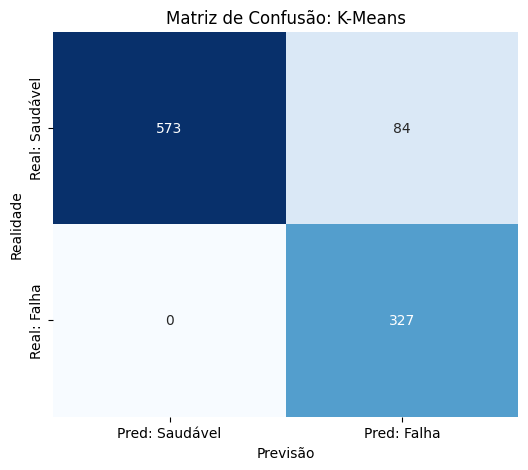

In [ ]:
cm = confusion_matrix(df_final['Gabarito'], pred_kmeans)

plt.figure(figsize = (6,5))
sns.heatmap (cm, annot=True, fmt = 'd', cmap = 'Blues', cbar = False,
             xticklabels =  ['Pred: Saudável', 'Pred: Falha'],
             yticklabels = ['Real: Saudável', 'Real: Falha'])
plt.title('Matriz de Confusão: K-Means')
plt.ylabel('Realidade')
plt.xlabel('Previsão')
plt.show()

**Os erros foram apenas Falsos Positivos, não houve nenhum Falso Negativo. Vamos plotar a distância euclidiana de cada ponto até o centro (como funciona o K-Means) para analisarmos se é tão óbvio assim.**

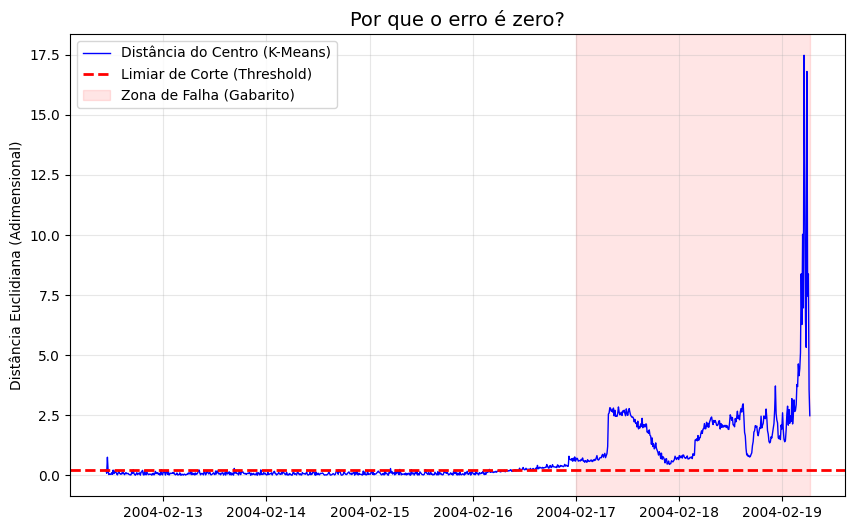

In [ ]:
distancias_total = kmeans.transform(X_scaled)

fig, ax = plt.subplots (figsize=(10,6))
ax.plot(df_final.index, distancias_total, label='Distância do Centro (K-Means)', color='blue', linewidth=1)
ax.axhline(y=limiar_km, color='red', linestyle='--', label='Limiar de Corte (Threshold)', linewidth=2)
ax.axvspan(pd.to_datetime('2004-02-17'), df_final.index[-1], color='red', alpha=0.1, label='Zona de Falha (Gabarito)')
ax.set_title('Por que o erro é zero?', fontsize=14)
ax.set_ylabel('Distância Euclidiana (Adimensional)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

**Realmente, a distância explode, portanto, não é tão estranho que o modelo tenha uma acertividade tão alta. Para finalizar, vamos fazer um gráfico do RMS vs Curtose para ver a fronteira de decisão do modelo**

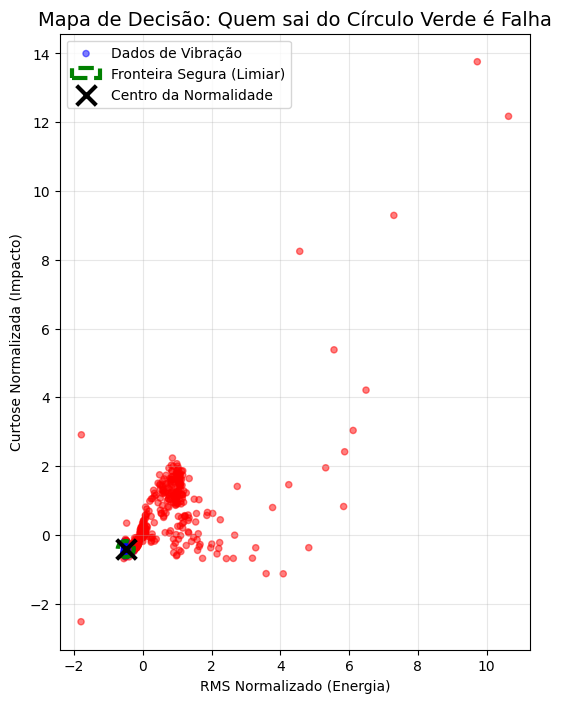

In [ ]:
X_plot = X_scaled
centro = kmeans.cluster_centers_[0]
raio = limiar_km

fig, ax = plt.subplots(figsize=(10, 8))

cores = ['blue' if x == 0 else 'red' for x in pred_kmeans]
ax.scatter(X_plot[:, 0], X_plot[:, 1], c=cores, alpha=0.5, s=20, label='Dados de Vibração')

circulo = plt.Circle(centro, raio, color='green', fill=False, linewidth=3, linestyle='--', label='Fronteira Segura (Limiar)')
ax.add_patch(circulo)

ax.scatter(centro[0], centro[1], c='black', marker='x', s=200, linewidth=3, label='Centro da Normalidade')

ax.set_title('Mapa de Decisão: Quem sai do Círculo Verde é Falha', fontsize=14)
ax.set_xlabel('RMS Normalizado (Energia)')
ax.set_ylabel('Curtose Normalizada (Impacto)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.show()

**Com esse gráfico, foi possível concluir que a física prevista para prever a falha dos rolamentos está correta, o "rastro" vermelho se distanciando da fronteira segura é bem visível, sendo assim, é possível aplicar em um projeto real. Para aplicar em um projeto real, como um carro, por exemplo, colocar um arduíno no automóvel que recebe os dados e calcula a RMS e a Curtose, normaliza os dados, calcula a distância e consegue decidir se a situação é crítica ou não**